# ML Learning starts:
Logistic Regression 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Try to visualize the data and then see whether :


-->data contains any NULL values


In [2]:
df=pd.read_csv("/content/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
print("information regarding the dataset",df.info)
df.info()
print("Rows and columns in the dataset",df.shape)

information regarding the dataset <bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  

NO NULL VALUES PRESENT
->The strange thing about the data is that A person of age 29 has **0 BP**.(Normal range is 80-120)

->So we need to impute values(by either mean,median or mode)


->Correlation check bw features so that if any feature is highly correlated to other feature we can simply drop that feature.


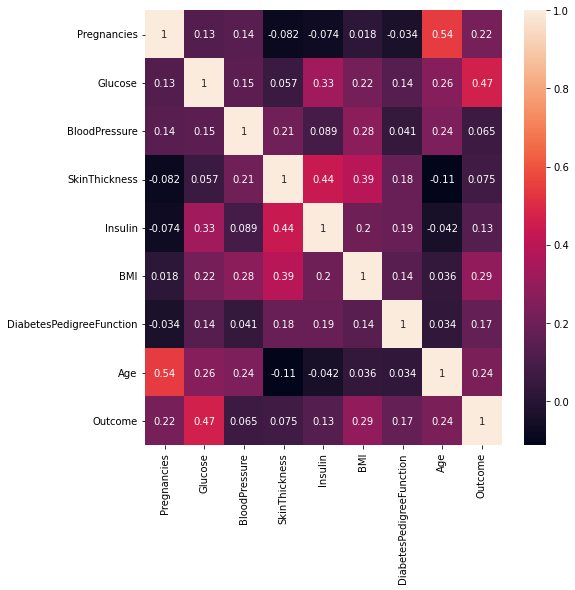

In [6]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(df.corr(),annot=True)
plt.show()

TO check whether the class is balanced or not. 

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

0    500
1    268
Name: Outcome, dtype: int64


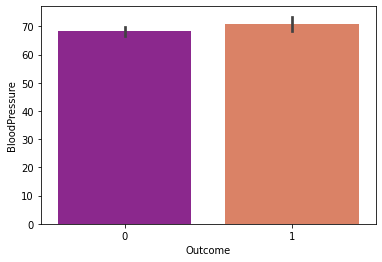

In [8]:
ax1=df.Outcome.value_counts()
print(ax1)
sns.barplot(x ='Outcome', y ='BloodPressure', data = df, 
            palette ='plasma')

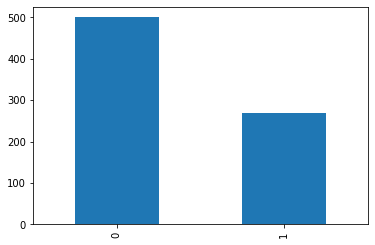

In [9]:
ax1.plot(kind='bar')

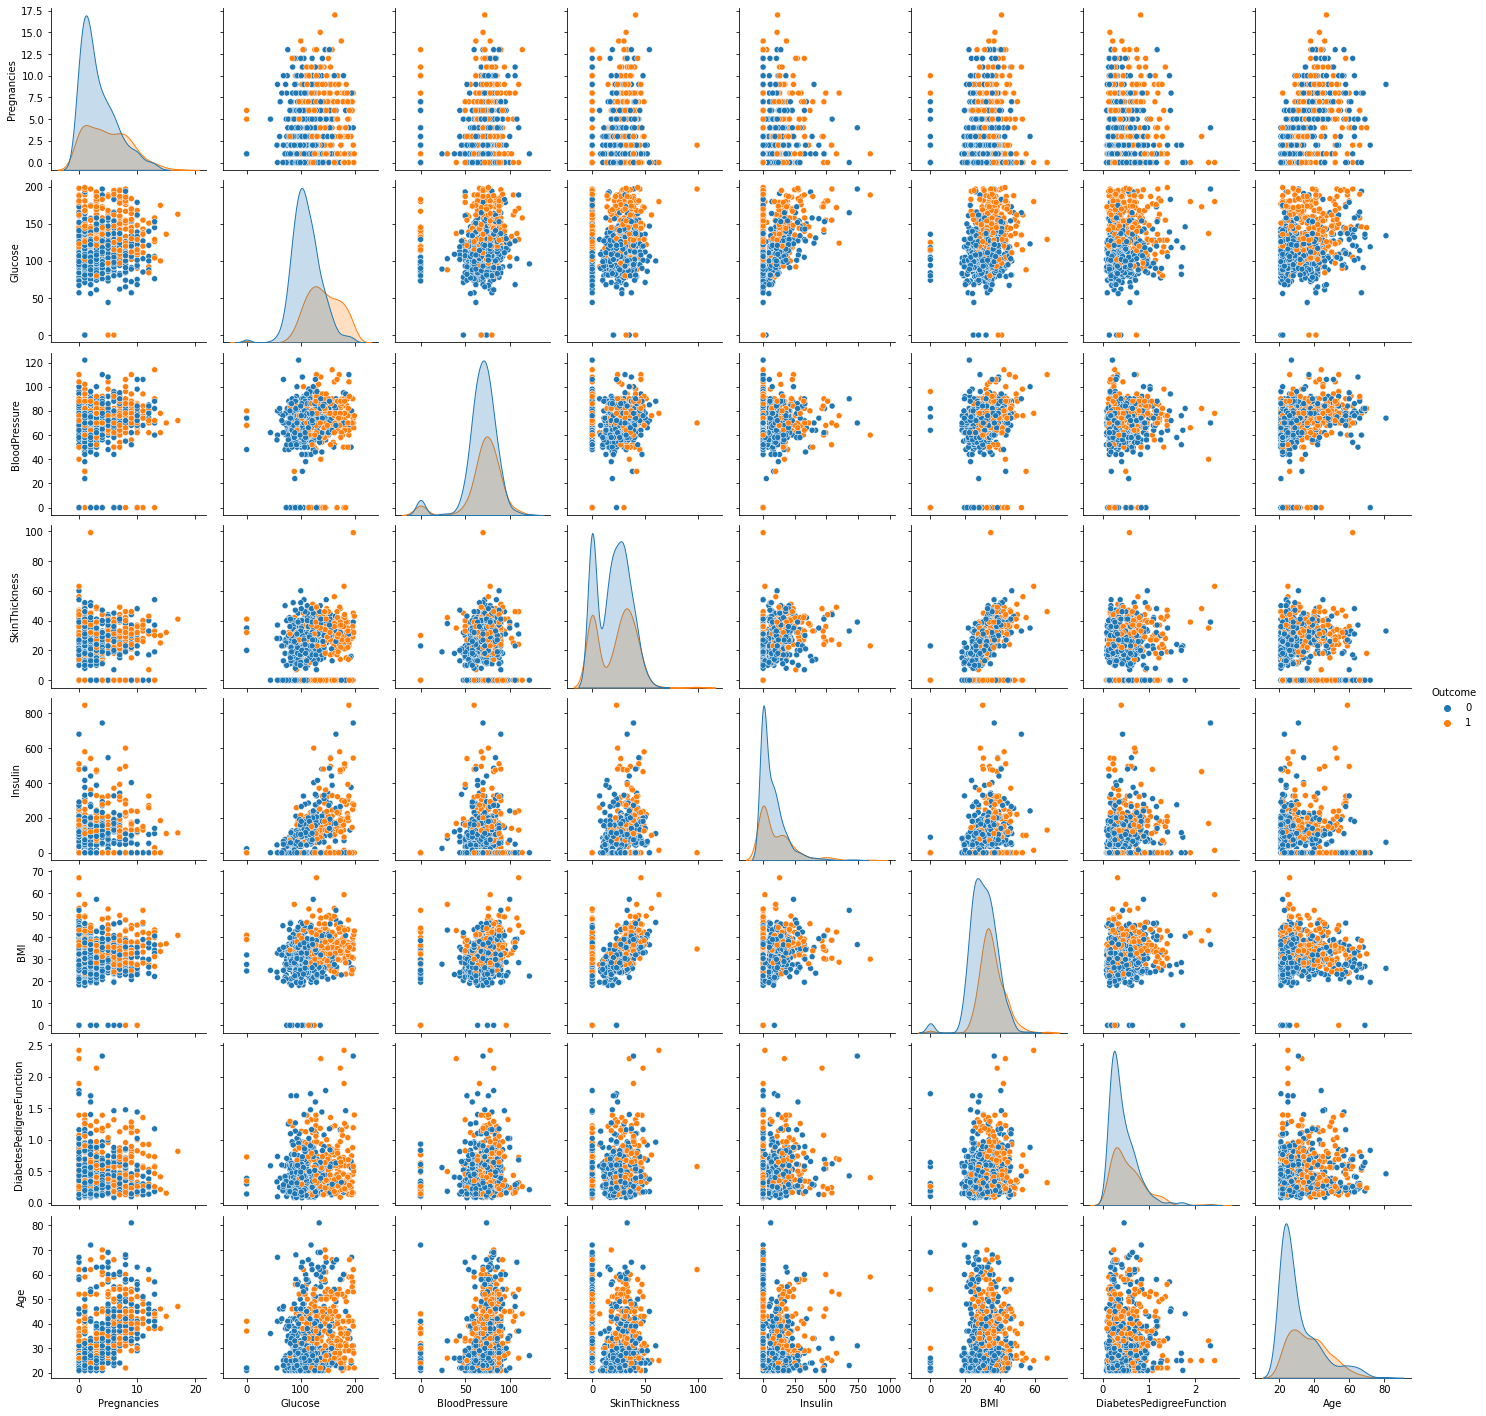

In [10]:
sns.pairplot(df,hue='Outcome')
plt.show()

In [11]:
df["BMI"].value_counts()[0]

11

In [12]:
def check (y):
  for i in range(len(df.columns)):
    x=df[y].value_counts()[0]
    return x


In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
check('BMI')

11

In [15]:
check("BloodPressure")

35

In [16]:
check("SkinThickness")

227

In [17]:
check('Insulin')

374

Since there are many vague values present as 0 in the features like BP,SkinThickness etc.
we need to replace them with some value.

**Impute them with median bcos dataset contains more outliers.**

In [18]:
df.value_counts()[0]

Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
57       60             0              0        21.7  0.735                     67   0          1
67       76             0              0        45.3  0.194                     46   0          1
181      88             44             510      43.3  0.222                     26   1          1
165      90             33             680      52.3  0.427                     23   0          1
167      0              0              0        32.3  0.839                     30   1          1
                                                                                               ..
126      84             29             215      30.7  0.520                     24   0          1
         86             27             120      27.4  0.515                     21   0          1
127      80             37             210      36.3  0.804                     23   0          1
128      68             1

In [19]:
mean_BMI = df['BMI'].mean(skipna=True)

32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: BMI, Length: 248, dtype: int64


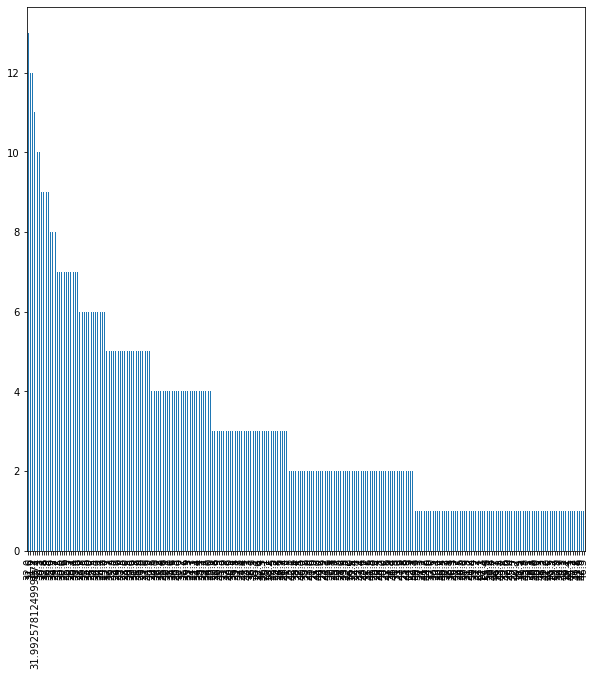

In [20]:
df['BMI']=df.BMI.mask(df.BMI == 0,mean_BMI)
print (df['BMI'].value_counts())
ax2=df['BMI'].value_counts()
plt.figure(figsize=(10,10))
ax2.plot(kind='bar')

In [21]:
mean_BloodPressure = df['BloodPressure'].mean(skipna=True)
df['BloodPressure']=df.BloodPressure.mask(df.BloodPressure == 0,mean_BloodPressure)
print (df['BloodPressure'].value_counts())

70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
69.105469     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
100.000000     3
106.000000     3
98.000000      3
110.000000     3
55.000000      2
108.000000     2
104.000000     2
46.000000      2
30.000000      2
122.000000     1
95.000000      1
102.000000     1
61.000000      1
24.000000      1
38.000000      1
40.000000      1
114.000000     1
Name: BloodPressure, dtype: int64


In [22]:
mean_Glucose = df['Glucose'].mean(skipna=True)
df['Glucose']=df.Glucose.mask(df.Glucose == 0,mean_Glucose)
print (df['Glucose'].value_counts())

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 136, dtype: int64


In [23]:
mean_Insulin = df['Insulin'].mean(skipna=True)
df['Insulin']=df.Insulin.mask(df.Insulin == 0,mean_Insulin)
print (df['Insulin'].value_counts())

79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
             ... 
73.000000       1
171.000000      1
255.000000      1
52.000000       1
112.000000      1
Name: Insulin, Length: 186, dtype: int64


In [24]:
mean_SkinThickness = df['SkinThickness'].mean(skipna=True)
df['SkinThickness']=df.SkinThickness.mask(df.SkinThickness == 0,mean_SkinThickness)
print (df['SkinThickness'].value_counts())

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
33.000000     20
28.000000     20
18.000000     20
31.000000     19
19.000000     18
39.000000     18
29.000000     17
40.000000     16
25.000000     16
26.000000     16
22.000000     16
37.000000     16
41.000000     15
35.000000     15
36.000000     14
15.000000     14
17.000000     14
20.000000     13
24.000000     12
42.000000     11
13.000000     11
21.000000     10
46.000000      8
34.000000      8
12.000000      7
38.000000      7
11.000000      6
43.000000      6
16.000000      6
45.000000      6
14.000000      6
44.000000      5
10.000000      5
48.000000      4
47.000000      4
49.000000      3
50.000000      3
8.000000       2
7.000000       2
52.000000      2
54.000000      2
63.000000      1
60.000000      1
56.000000      1
51.000000      1
99.000000      1
Name: SkinThickness, dtype: int64


In [25]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

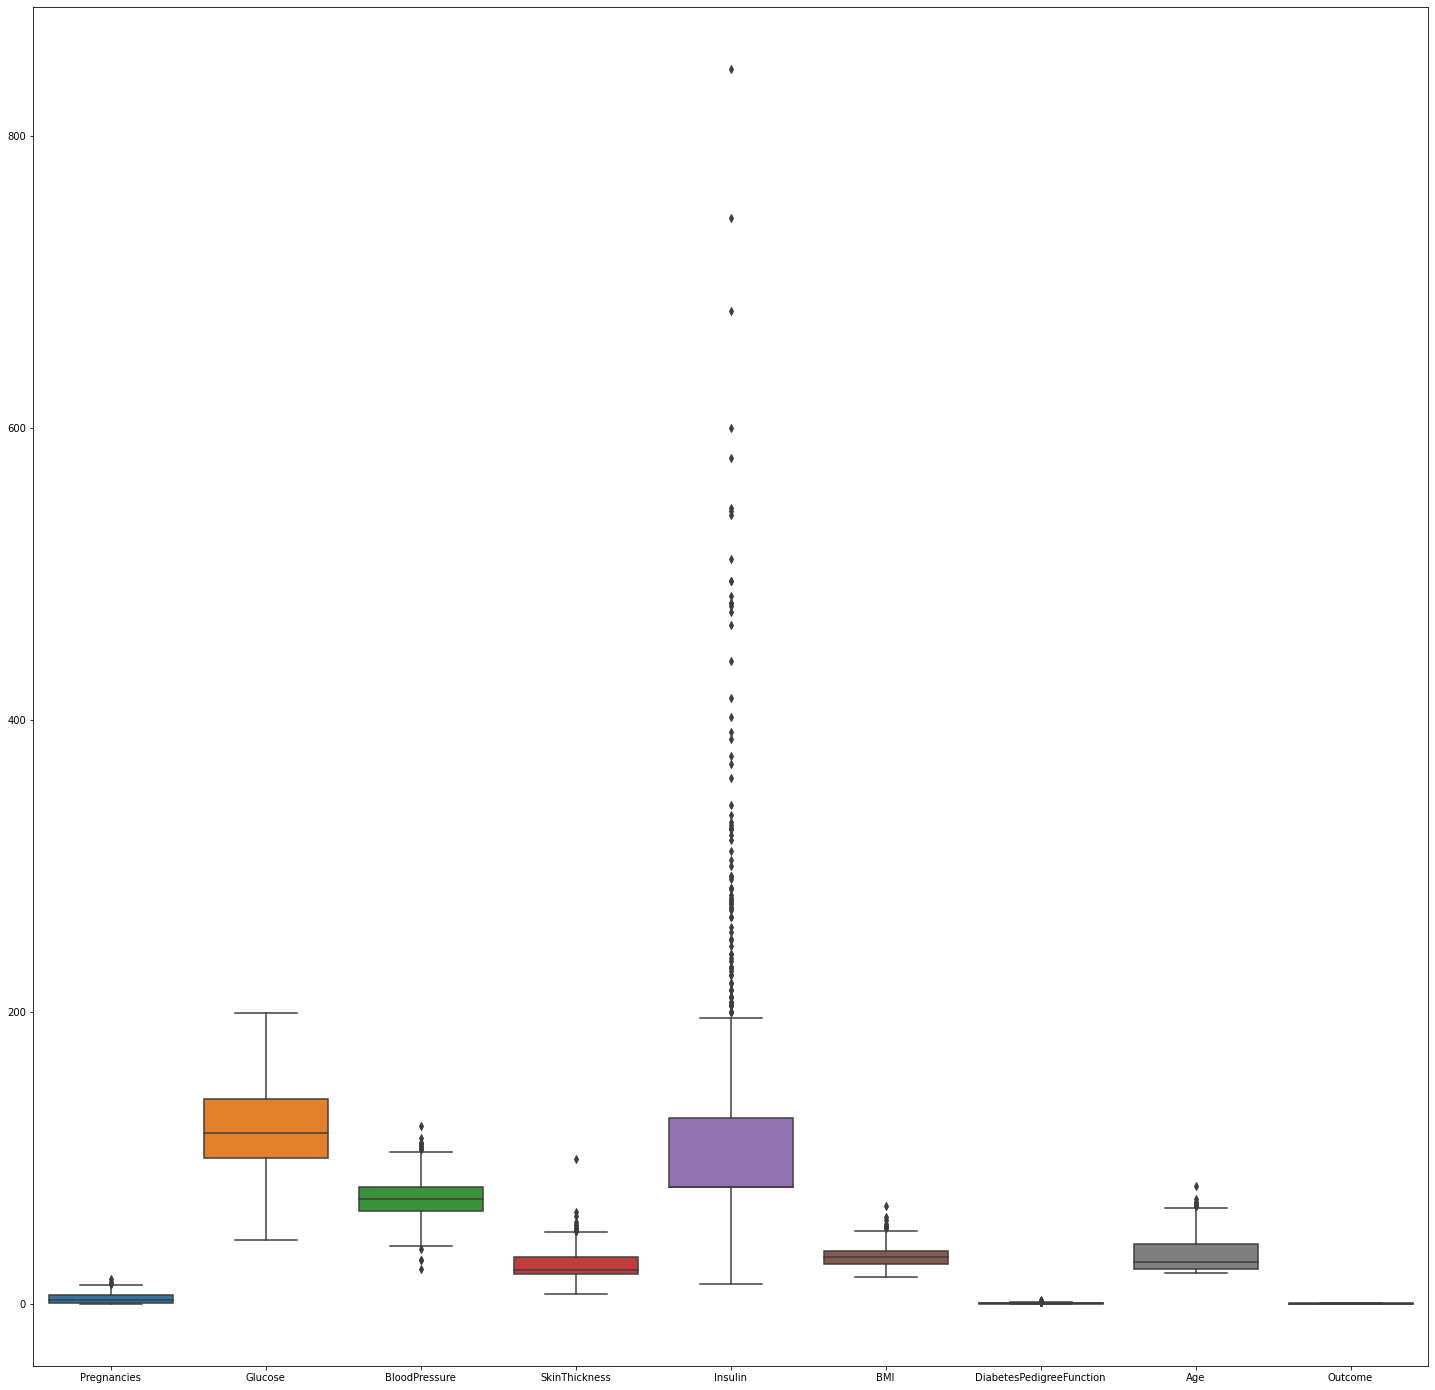

In [26]:
plt.figure(figsize=(25,25))
sns.boxplot(data=df)

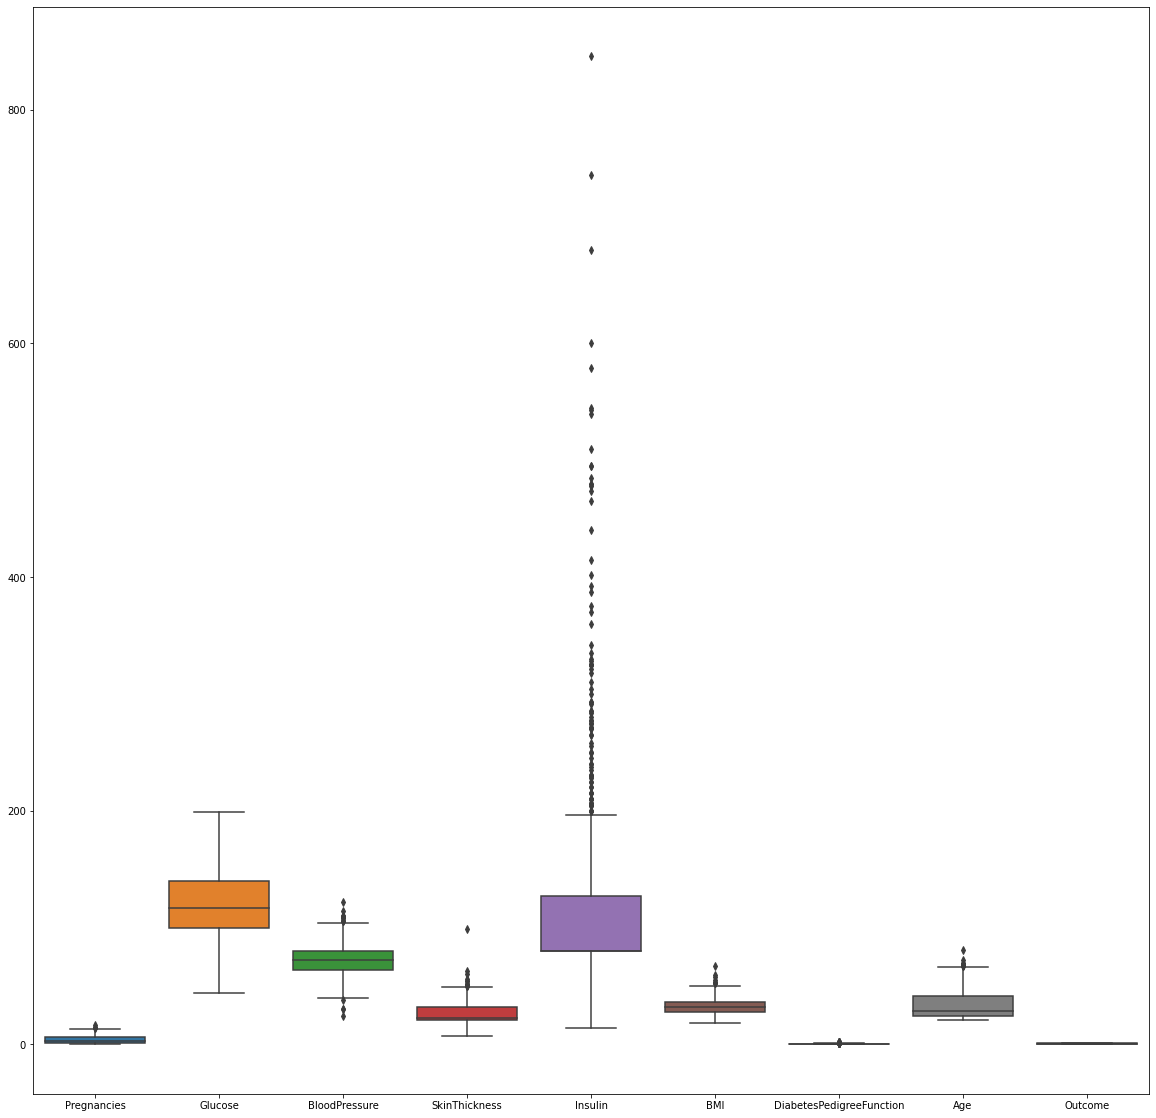

In [27]:
fig,ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df,ax=ax )

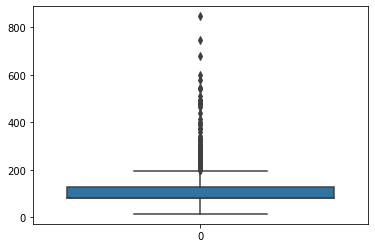

In [28]:
sns.boxplot(data=df['Insulin'])

Mean is the accurate measure to describe the data when we do not have any outliers present.

Median is used if there is an outlier in the dataset.

Mode is used if there is an outlier AND about ½ or more of the data is the same.

‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.
Consider a small dataset, sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]. By looking at it, one can quickly say ‘101’ is an outlier that is much larger than the other values.

small dataset.
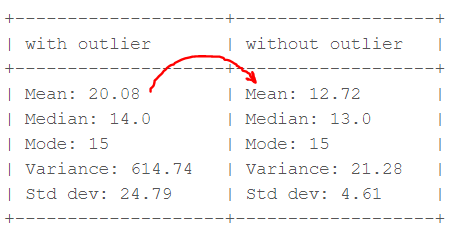

In [29]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df['Insulin'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [543.0, 846.0, 495.0, 485.0, 495.0, 478.0, 744.0, 680.0, 402.0, 545.0, 465.0, 415.0, 579.0, 474.0, 480.0, 600.0, 440.0, 540.0, 480.0, 510.0]


Outliers from IQR method:  [200.0, 200.0, 200.0, 200.0, 204.0, 205.0, 205.0, 207.0, 207.0, 210.0, 210.0, 210.0, 210.0, 210.0, 215.0, 215.0, 215.0, 220.0, 220.0, 225.0, 225.0, 228.0, 230.0, 230.0, 231.0, 231.0, 235.0, 237.0, 240.0, 240.0, 245.0, 249.0, 250.0, 255.0, 258.0, 265.0, 265.0, 270.0, 271.0, 272.0, 274.0, 275.0, 277.0, 278.0, 280.0, 284.0, 285.0, 285.0, 291.0, 293.0, 293.0, 300.0, 304.0, 310.0, 318.0, 321.0, 325.0, 325.0, 325.0, 326.0, 328.0, 330.0, 335.0, 342.0, 360.0, 370.0, 375.0, 387.0, 392.0, 402.0, 415.0, 440.0, 465.0, 474.0, 478.0, 480.0, 480.0, 485.0, 495.0, 495.0, 510.0, 540.0, 543.0, 545.0, 579.0, 600.0, 680.0, 744.0, 846.0]


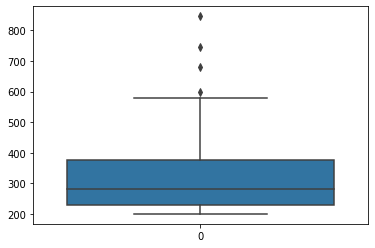

In [75]:
#https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df['Insulin'])
print("Outliers from IQR method: ", sample_outliers)
sns.boxplot(data=sample_outliers)

In [30]:
print("Q2 quantile of df['Insulin'] : ", np.quantile(df['Insulin'], .50))
print("Q1 quantile of df['Insulin'] : ", np.quantile(df['Insulin'], .25))
print("Q3 quantile of df['Insulin'] : ", np.quantile(df['Insulin'], .75))
print("100th quantile of df['Insulin'] : ", np.quantile(df['Insulin'], .1))

Q2 quantile of df['Insulin'] :  79.79947916666667
Q1 quantile of df['Insulin'] :  79.79947916666667
Q3 quantile of df['Insulin'] :  127.25
100th quantile of df['Insulin'] :  67.0


In [32]:
new_Insulin=df['Insulin'].quantile(0.95)
new_Ins=df[df['Insulin']<new_Insulin]


In [33]:
new_Ins.shape

(728, 9)

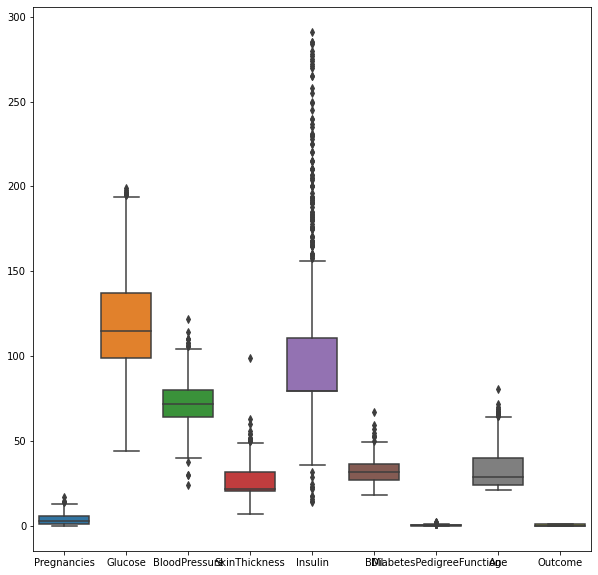

In [35]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=new_Ins,ax=ax)

In [39]:
new_Insulin=df['Insulin'].quantile(0.85)
new_Ins=df[df['Insulin']<new_Insulin]


In [40]:
new_Ins.shape

(652, 9)

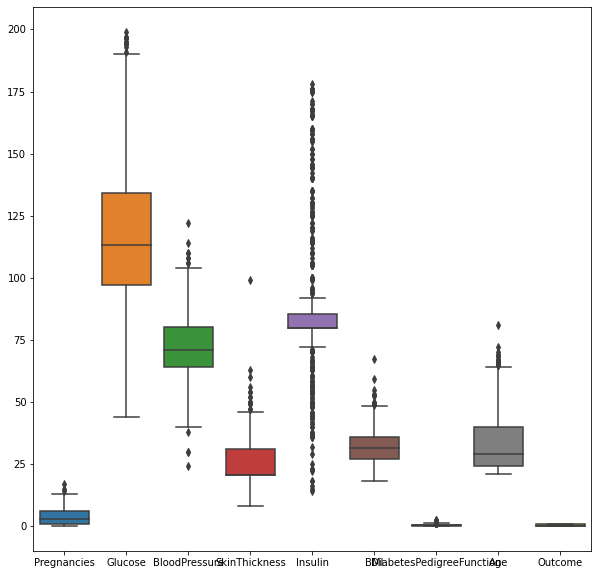

In [41]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=new_Ins,ax=ax)

In [63]:
new_Insulin=df['Insulin'].quantile(0.995)
new_data=df[df['Insulin']<new_Insulin]


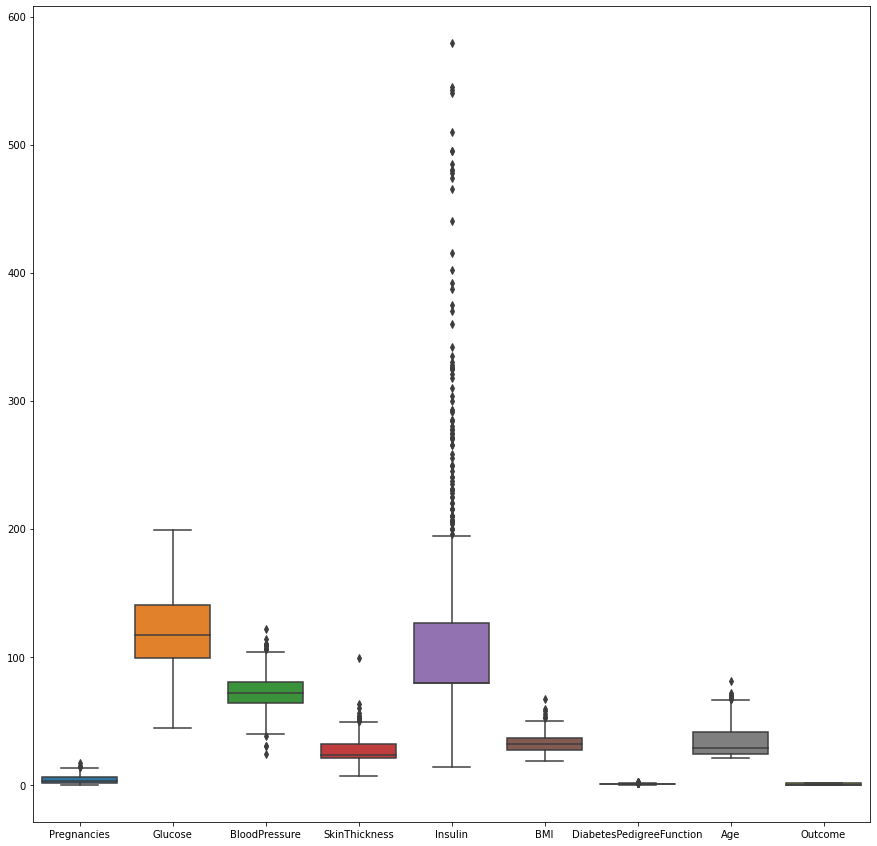

In [64]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=new_data,ax=ax)

In [65]:
new_BloodPressure=df['BloodPressure'].quantile(0.995)
new_data=df[df['BloodPressure']<new_BloodPressure]


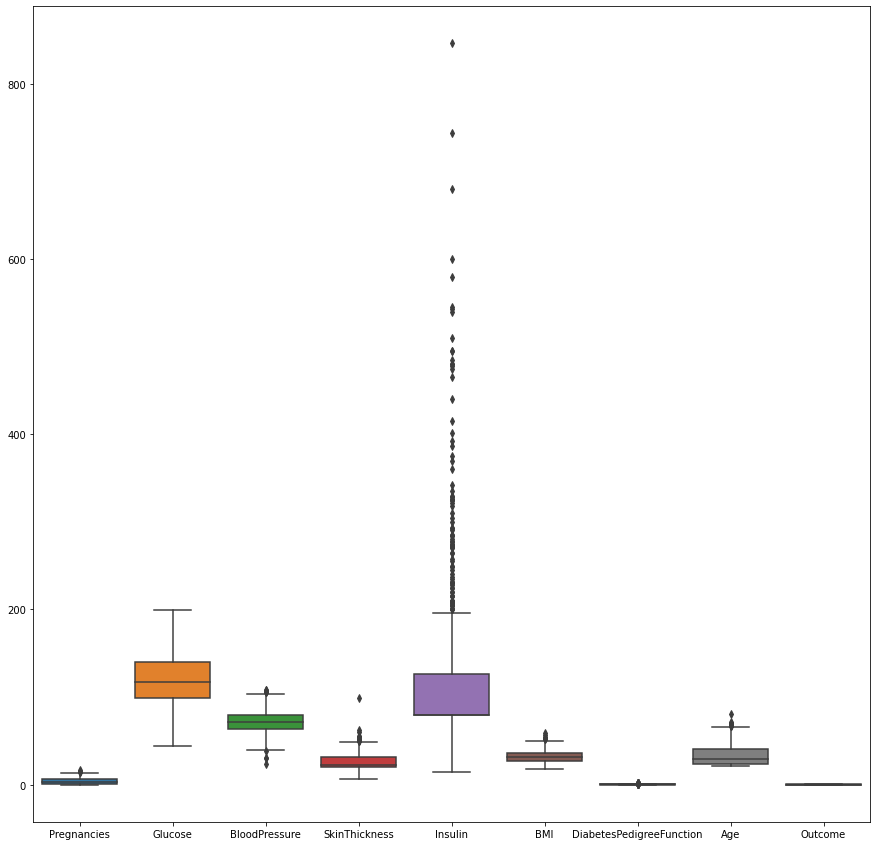

In [66]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=new_data,ax=ax)

In [67]:
new_SkinThickness=df['SkinThickness'].quantile(0.995)
new_data=df[df['SkinThickness']<new_SkinThickness]


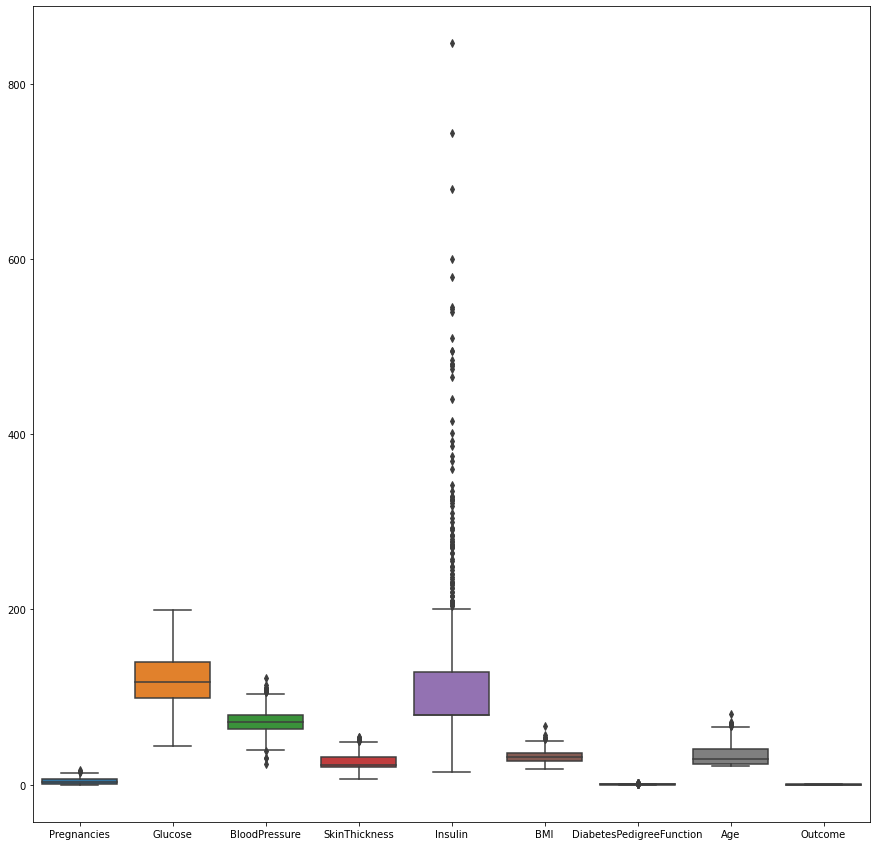

In [68]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=new_data,ax=ax)

In [69]:
new_BMI=df['BMI'].quantile(0.95)
new_data=df[df['BMI']<new_BMI]


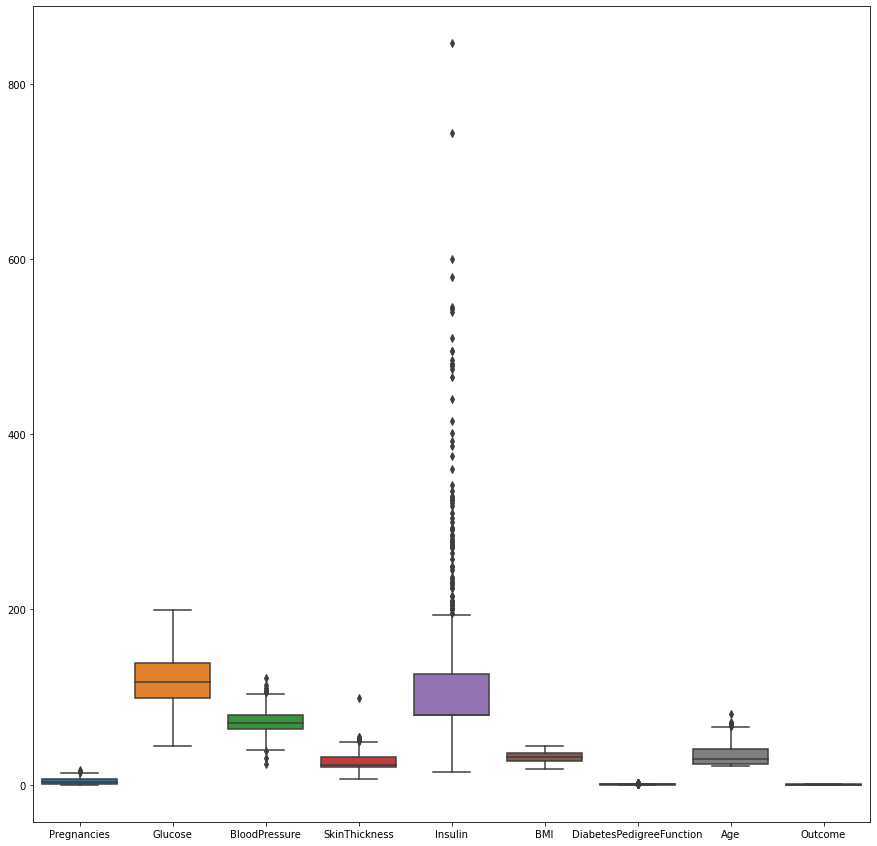

In [70]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=new_data,ax=ax)

In [71]:
new_PG=df['Pregnancies'].quantile(0.95)
new_data=df[df['Pregnancies']<new_PG]


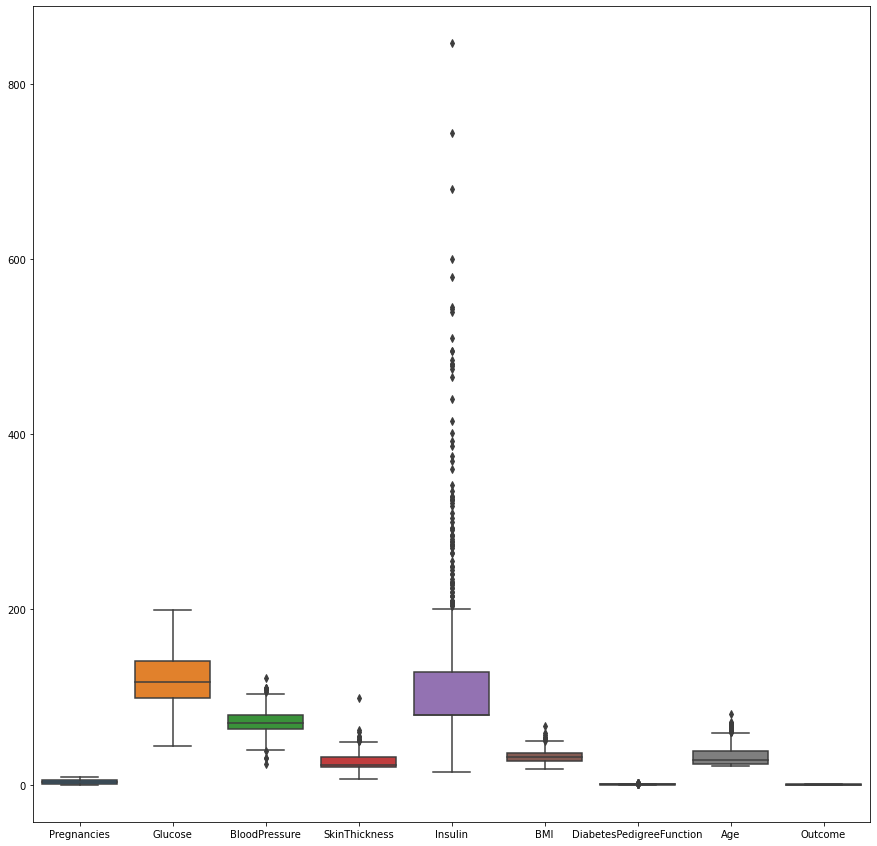

In [72]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=new_data,ax=ax)

In [62]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [73]:
new_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [79]:
X=new_data.drop(columns='Outcome',axis=1)
Y=new_data['Outcome']

In [80]:
X.shape

(710, 8)

In [81]:
Y


0      1
1      0
2      1
3      0
4      1
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 710, dtype: int64

StdScaler form says mean=0,std dev=1 so normal form

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [83]:
X_scaled=scaler.fit_transform(X)

In [85]:
type(X_scaled)

numpy.ndarray

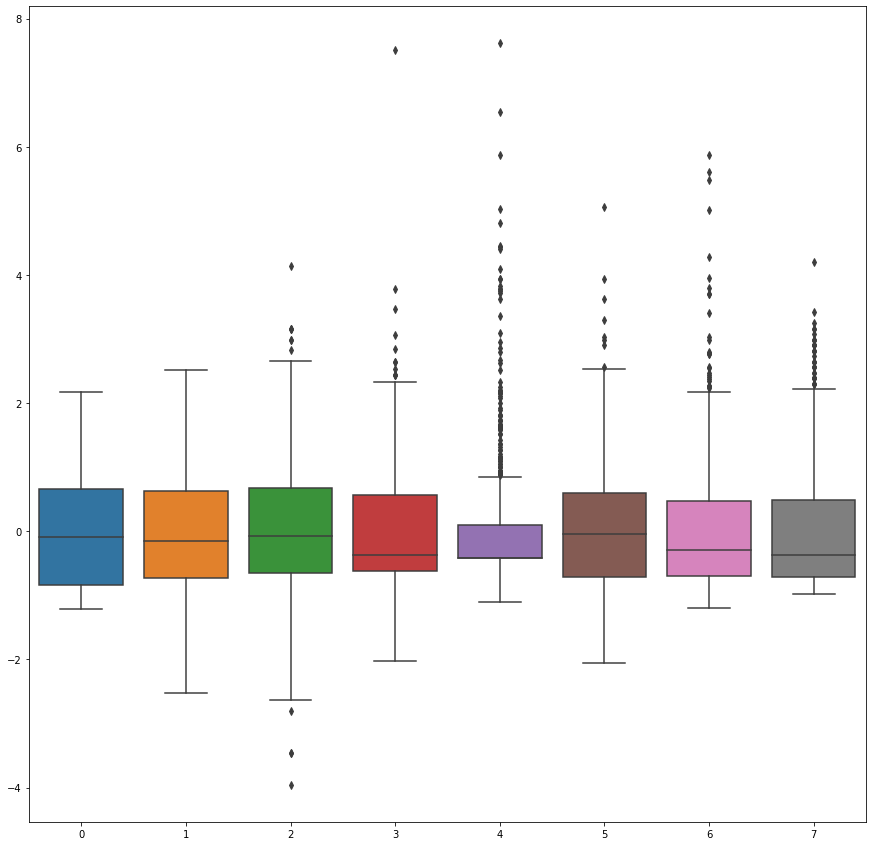

In [87]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=X_scaled,ax=ax)

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=42)

In [93]:
X_train.shape


(532, 8)

In [94]:
y_train.shape

(532,)

In [95]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [96]:
y_pred=model.predict(X_test
                     )

In [ ]:
y_pred_prob=model.predict_proba(X_test)
print(y_pred_prob)
#prob of 0 and 1

In [100]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)


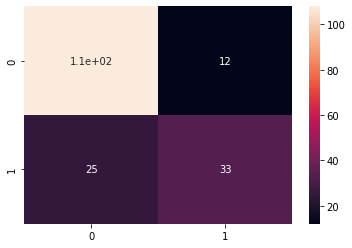

In [103]:
sns.heatmap(cf_matrix, annot=True)

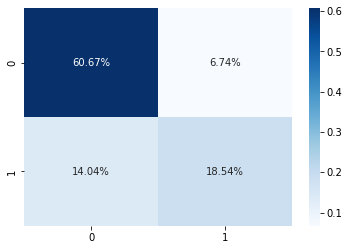

In [104]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [106]:
from sklearn.metrics import roc_auc_score,roc_curve

In [107]:
roc_curve(y_test,y_pred)

(array([0. , 0.1, 1. ]),
 array([0.        , 0.56896552, 1.        ]),
 array([2, 1, 0]))

In [110]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7344827586206898

In [111]:
falsepr,truepr,thresholds=roc_curve(y_test,y_pred)

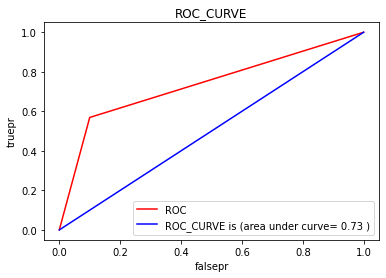

In [122]:
plt.plot(falsepr,truepr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='blue',label='ROC_CURVE is (area under curve= %0.2f )'%auc)
plt.xlabel('falsepr')
plt.ylabel('truepr')
plt.title('ROC_CURVE')
plt.legend()
plt.show()


In [117]:
from sklearn.metrics import accuracy_score
print("Accuracy ",accuracy_score(y_test,y_pred))

Accuracy  0.7921348314606742
